## Data Sprint #19: Classification of Microorganisms of Sukhna and Dhanas Lakes


**Objective:**

You are required to build a machine learning model to predict the class of given microorganism on the basis of their morphological features.

**Evaluation Criteria:**

Submissions are evaluated using Weighted F1 Score.

### More about F1 score:
It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall. A good F1 score means that you have low false positives and low false negatives. An F1 score is considered perfect when it’s 1, while the model is a total failure when it’s 0. 

Weighted F1 Scores are F1 scores calculated for each label and then their average is weighted by support - which is the number of true instances for each label. It can result in an F-score that is not between precision and recall.

Click [here](https://www.baeldung.com/cs/multi-class-f1-score) for more information on F1 Score for multiclass classification. 



## About the data

The dataset consists of morphological features that map the body structure for four different classes of microorganisms. These microorganisms are found in the lakes of Sukhna and Dhanas, Chandigarh, India. The images of microorganisms were captured by taking microscopic images of whole mounted glass slides and features were noted.

<sub><sup>Acknowledgement:
The dataset is sourced from Mendeley data. 
Dhindsa, Anaahat ; Bhatia , Sanjay; Agrawal, Sunil; sohi, bs (2020), “Classification of Microorganisms of Sukhna and Dhanas Lakes”, Mendeley Data, V2, doi: 10.17632/bcnv3n43wg.2</sup></sub>


### Import the necessary Libraries and read the data

In [1]:
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for data preprocessing and splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#for building, tuning and evalutaing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,precision_recall_fscore_support

#for feature selection 
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

### Load the data and display first 5 rows

In [2]:
mo_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/train_set_label.csv")
print(mo_data.shape)
print(mo_data.columns)
mo_data.head()

(13824, 24)
Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area',
       'microorganism'],
      dtype='object')


,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
0,0.711636,0.673498,0.109069,0.870544,0.010808,0.660599,0.094353,0.987915,0.870476,0.447276,0.029022,0.058923,0.875395,0.875395,0.877460,0.871746,0.025669,0.028256,0.010776,0.001776,0.878873,0.453973,0.020195,1
1,0.184271,0.865533,0.181675,0.306442,0.021235,0.183804,0.484926,0.974488,0.284444,0.345343,0.148896,0.115320,0.304870,0.304870,0.295238,0.290794,0.128062,0.077815,0.044747,0.016309,0.325508,0.360384,0.045702,2
2,0.431175,0.679469,0.172644,0.750469,0.020929,0.380940,0.891717,0.946626,0.707302,0.227592,0.066246,0.109428,0.728653,0.728653,0.729524,0.723810,0.065495,0.062696,0.049242,0.006400,0.739531,0.255860,0.042004,2
3,0.712849,0.991839,0.240241,0.271420,0.036976,0.700643,0.016835,0.975159,0.268571,0.468366,0.023344,0.249158,0.270715,0.270715,0.269841,0.268571,0.146561,0.020286,0.035455,0.006678,0.267614,0.568813,0.073303,4
4,0.338077,0.996782,0.123578,0.045654,0.011389,0.088682,0.219150,0.982544,0.041905,0.630931,0.100946,0.187710,0.041746,0.041746,0.041905,0.041905,0.134704,0.011038,0.034491,0.004833,0.071762,0.699979,0.024521,2


### Data Description
There are 13,824 rows and 24 columns.
The column description are as follows:

- **Solidity:** It is the ratio of area of an object to the area of a convex hull of the object. Computed as Area/ConvexArea
- **Eccentricity:** The eccentricity is the ratio of length of major to minor axis of an object.
- **EquivDiameter:** Diameter of a circle with the same area as the region.
- **Extrema:** Extrema points in the region. The format of the vector is [top-left top-right right-top right-bottom bottom-right bottom-left left-bottom left-top].
- **Filled Area:** Number of on pixels in FilledImage, returned as a scalar.
- **Extent:** Ratio of the pixel area of a region with respect to the bounding box area of an object.  
- **Orientation:** The overall direction of the shape. The value ranges from -90 degrees to 90 degrees.
- **Euler number:** Number of objects in the region minus the number of holes in those objects.
- **Bounding box:** Position and size of the smallest box (rectangle) which bounds the object.
- **Convex hull:** Smallest convex shape/polygon that contains the object.
- **Major axis:** The major axis is the endpoints of the longest line that can be drawn through the object. Length (in pixels) of the major axis is the largest dimension of the object.
- **Minor axis:** The axis perpendicular to the major axis is called the minor axis. Length (in pixels) of the minor axis is the smallest line connecting a pair of points on the contour.
- **Perimeter:** Number of pixels around the border of the region.
- **Centroid:** Centre of mass of the region. It is a measure of the object's location in the image.
- **Area:** Total number of pixels in a region/shape.
- **microorganism:** The class of microorganisms, the target variable


### Perform Basic Exploratory Data Analysis

In [3]:
mo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13824 entries, 0 to 13823
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         13824 non-null  float64
 1   Eccentricity     13824 non-null  float64
 2   EquivDiameter    13824 non-null  float64
 3   Extrema          13824 non-null  float64
 4   FilledArea       13824 non-null  float64
 5   Extent           13824 non-null  float64
 6   Orientation      13824 non-null  float64
 7   EulerNumber      13824 non-null  float64
 8   BoundingBox1     13824 non-null  float64
 9   BoundingBox2     13824 non-null  float64
 10  BoundingBox3     13824 non-null  float64
 11  BoundingBox4     13824 non-null  float64
 12  ConvexHull1      13824 non-null  float64
 13  ConvexHull2      13824 non-null  float64
 14  ConvexHull3      13824 non-null  float64
 15  ConvexHull4      13824 non-null  float64
 16  MajorAxisLength  13824 non-null  float64
 17  MinorAxisLen

In [4]:
mo_data.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
count,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000
mean,0.483543,0.816668,0.158836,0.528733,0.027930,0.390554,0.480102,0.967930,0.483085,0.444948,0.085813,0.123932,0.494234,0.494234,0.487924,0.487700,0.082797,0.043939,0.049383,0.012236,0.515745,0.479954,0.048216,2.500000
std,0.209131,0.168313,0.111070,0.238477,0.048621,0.218697,0.310809,0.045840,0.239790,0.227774,0.088206,0.111279,0.236573,0.236573,0.238699,0.239473,0.086908,0.052404,0.068806,0.041491,0.239394,0.224588,0.065958,1.118074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.298202,0.719613,0.091416,0.352069,0.008160,0.213847,0.165487,0.962403,0.307823,0.266257,0.028391,0.052066,0.320683,0.320683,0.317745,0.311429,0.025956,0.020286,0.011265,0.001776,0.336157,0.314578,0.015655,1.750000
50%,0.466642,0.869592,0.135782,0.524431,0.015266,0.354430,0.522795,0.980866,0.459683,0.449033,0.063432,0.090909,0.478052,0.478052,0.463492,0.462857,0.057924,0.028227,0.026138,0.003972,0.508826,0.462994,0.028598,2.500000
75%,0.669901,0.938896,0.209592,0.715447,0.031614,0.523621,0.752532,0.990260,0.661587,0.590510,0.114676,0.162458,0.676154,0.676154,0.668571,0.673651,0.112127,0.056314,0.057580,0.010660,0.710310,0.658128,0.058514,3.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [5]:
#below code will display only the columns with missing values (in percentage of missing values to the total rows)
missing_val = mo_data.isna().sum()
print("\033[1m Number of missing values by column \033[0m:\n ",missing_val[missing_val>0])
print("Percentage of missing values by column: ")
missing_val[missing_val > 0]/mo_data.shape[0]*100

 Number of missing values by column :
  Series([], dtype: int64)
Percentage of missing values by column: 


Series([], dtype: float64)

In [6]:
mo_data["microorganism"].value_counts()

4    3456
3    3456
2    3456
1    3456
Name: microorganism, dtype: int64

In [7]:
mo_data.duplicated().sum()

8959

In [8]:
mo_data.duplicated().value_counts()

True     8959
False    4865
dtype: int64

In [9]:
#Check duplicates per class
mo_data[mo_data.duplicated()].groupby('microorganism').count()['Area']

microorganism
1    2587
2    2915
3    2256
4    1201
Name: Area, dtype: int64

1. The dataset consists of no missing values  
2. There are no categorical variables based on the datatype
3. The column 'microorganism' is the target column
4. The target column has 4 classes with equal number of unique observations for each class. Therefore, there is no need for a class imbalance treatment 
5. There are 9k duplicates. However, we will not be dropping them right away since:
 - There is a possibility that multiple microorganisms belonging to the same class will have same measurements
 -  It forms more than 50% of the dataset
 - There will be a slight class imbalance as the records for class 4 will be significaly higher than the other classes

We will experiment with and without dropping the duplicates to see what works the best for the chosen model. 

The problem to predict the class of a given microorgansim is a **classification** problem.

**OBSERVATIONS:** 

**Correlation Matrix**

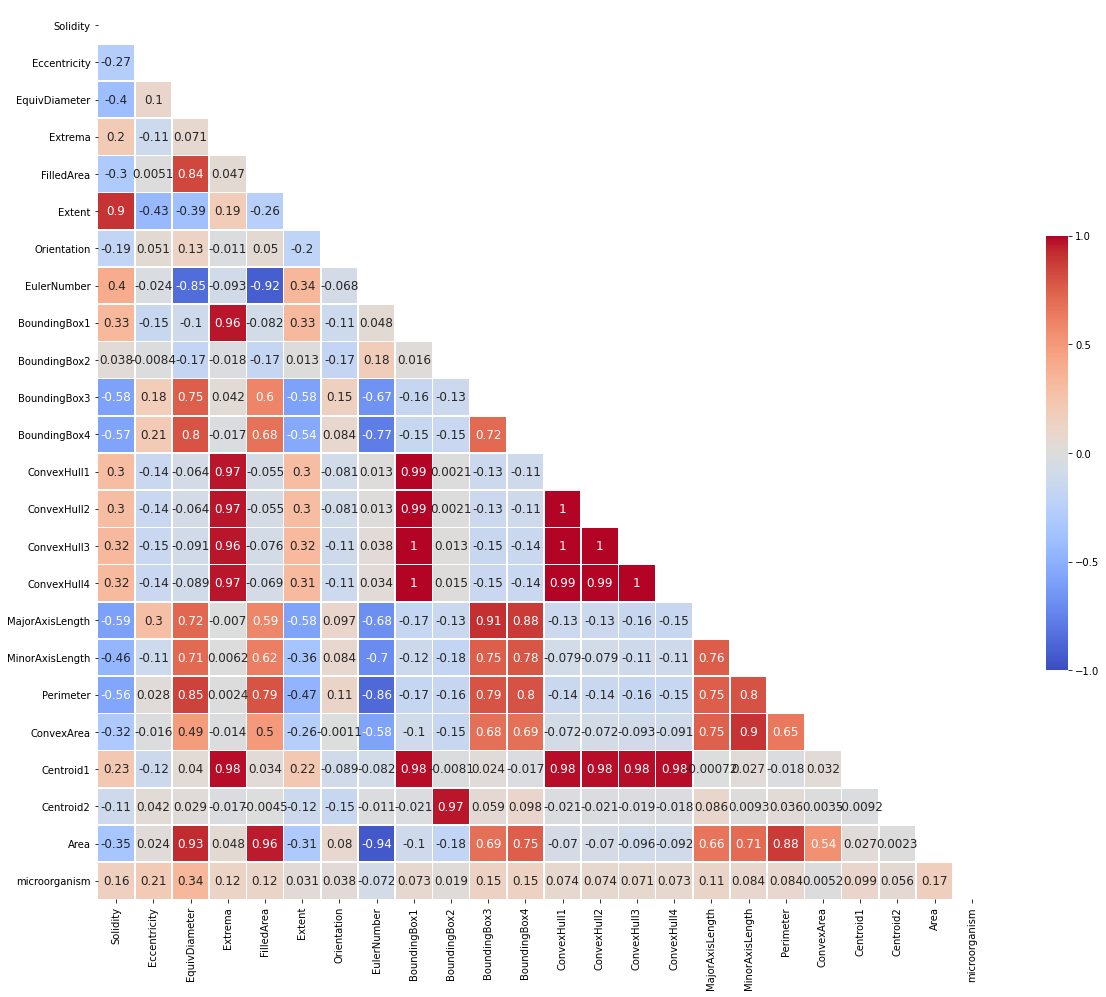

In [10]:
# Let us take a look at how the numerical variables are correlated to each other and the target variable using correlation matrix
corr_matrix = mo_data.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20))

heatmap = sns.heatmap(corr_matrix,
                       mask = mask,
                       square = True,
                       linewidths = .5,
                       cmap = 'coolwarm',
                       cbar_kws = {'shrink': .4,
                                 'ticks' : [-1, -.5, 0, 0.5, 1]},
                       vmin = -1,
                       vmax = 1,
                       annot = True,
                       annot_kws = {"size": 12})

# add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

**The top variables that seem to be positively correlated to microorganism class are:**
  - EquivDiameter
  - Eccentricity
  - Area
  - Solidity
 
**There is a high correlation between the following pairs of variables:**
 - BoundingBox1 and Centroid1 
 - BoundingBox2 and Centroid2
 - Area and EquivDiameter 
 - Area and FilledArea
 - Area, Perimeter,FilledArea and EulerNumber 
 - ConvexHull(1,2,3,4) and Centroid1
 - ConvexHull(1,2,3,4) and BoundingBox1
 - ConvexHull(1,2,3,4) and Extrema

**Data Distribution**

Text(0.5, 1.0, 'Histograms - Distribution of data')

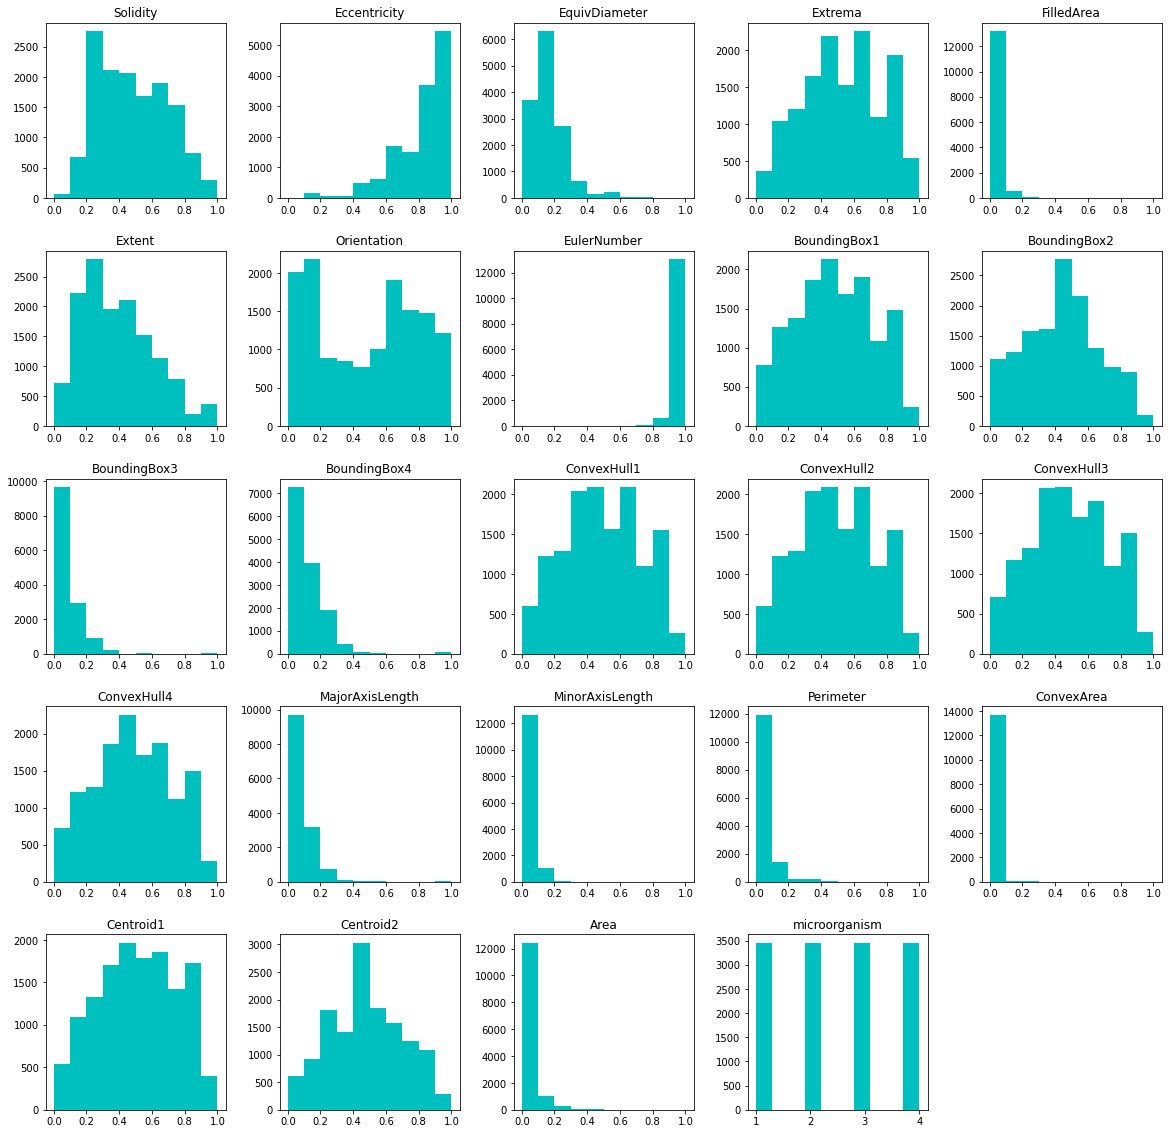

In [11]:
mo_data.hist(figsize=(20,20),color='c',grid=False);
plt.title("Histograms - Distribution of data")

- We separate the target variable from the feature variables and split the dataset into train and test sets before doing further analysis. We perform preprocesing separately on the train and test datasets to prevent data leakage.

- The Data is already Scaled ie. between 0 and 1

### Separate the Input and Target Features of the data

In [12]:
X = mo_data.drop('microorganism',axis=1)
y = mo_data['microorganism']
print(X.shape)
print(X.head())
y.head()

(13824, 23)
   Solidity  Eccentricity  EquivDiameter  ...  Centroid1  Centroid2      Area
0  0.711636      0.673498       0.109069  ...   0.878873   0.453973  0.020195
1  0.184271      0.865533       0.181675  ...   0.325508   0.360384  0.045702
2  0.431175      0.679469       0.172644  ...   0.739531   0.255860  0.042004
3  0.712849      0.991839       0.240241  ...   0.267614   0.568813  0.073303
4  0.338077      0.996782       0.123578  ...   0.071762   0.699979  0.024521

[5 rows x 23 columns]


0    1
1    2
2    2
3    4
4    2
Name: microorganism, dtype: int64

### Split the data into Train and Test Sets

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11750, 23)
(11750,)
(2074, 23)
(2074,)


### Build a baseline Machine Learning Model


### Using Random Forest as classifier and selecting relevant features

In [14]:
# fit model to training data
rfc = RandomForestClassifier(n_estimators=700,max_depth=None,random_state=4)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

#precision, recall, fscore  = precision_recall_fscore_support(y_test,y_pred)
test_ac = f1_score(y_test,y_pred,average='weighted')
train_ac = f1_score(y_train,rfc.predict(X_train),average='weighted')
print("Baseline Train Model Accuracy:", train_ac)
print("Baseline Model Accuracy:", test_ac)

print("Baseline Model Classification Report:\n",classification_report(y_test,y_pred))


Baseline Train Model Accuracy: 0.9998297872873775
Baseline Model Accuracy: 0.9908422284989626
Baseline Model Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       536
           2       0.99      0.99      0.99       522
           3       0.98      0.99      0.98       489
           4       1.00      1.00      1.00       527

    accuracy                           0.99      2074
   macro avg       0.99      0.99      0.99      2074
weighted avg       0.99      0.99      0.99      2074



### Using XGBoost Classifier

Baseline Train Model Accuracy: 0.9998297872873775
Baseline Model Accuracy: 0.9908446342174073
Baseline Model Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       536
           2       0.98      0.99      0.99       522
           3       0.98      0.99      0.99       489
           4       1.00      1.00      1.00       527

    accuracy                           0.99      2074
   macro avg       0.99      0.99      0.99      2074
weighted avg       0.99      0.99      0.99      2074



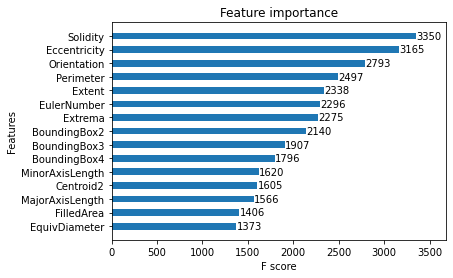

<Figure size 1440x720 with 0 Axes>

In [17]:
# fit model to training data
xgb = XGBClassifier(n_estimators=200,random_state=1,learning_rate=0.08,n_jobs=-1,max_depth=9,subsample=0.8)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

#precision, recall, fscore  = precision_recall_fscore_support(y_test,y_pred)
test_ac = f1_score(y_test,y_pred,average='weighted')
train_ac = f1_score(y_train,xgb.predict(X_train),average='weighted')
print("Baseline Train Model Accuracy:", train_ac)
print("Baseline Model Accuracy:", test_ac)

print("Baseline Model Classification Report:\n",classification_report(y_test,y_pred))
plot_importance(xgb,height=0.5,grid=False,max_num_features=15)
plt.figure(figsize=(20,10))
plt.show()

## Feature Selection
Select top 10 Features 

In [18]:
selection = SelectFromModel(xgb)
selection.fit(X_train, y_train)
feature_idx = selection.get_support()
feature_name = X_train.columns[feature_idx]

print("\033[1mSelected Features:\n\033[10")
print(" ")
print(feature_name)
print(" ")
# Transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test) 

# train model
selection_model = XGBClassifier(n_estimators=200,random_state=1,learning_rate=0.08,n_jobs=-1,max_depth=9,subsample=0.8)
selection_model.fit(select_X_train, y_train)
y_pred = selection_model.predict(select_X_test)

Selected Features:
[10
 
Index(['Solidity', 'EquivDiameter', 'Extent', 'BoundingBox3', 'Perimeter',
       'ConvexArea', 'Area'],
      dtype='object')
 


In [19]:
test_ac = f1_score(y_test,y_pred,average='weighted')
train_ac = f1_score(y_train,selection_model.predict(select_X_train),average='weighted')
print("Train Model Accuracy:", train_ac)
print("Test Model Accuracy:", test_ac)

Train Model Accuracy: 0.9998297872873775
Test Model Accuracy: 0.9631581274653662


## Hyperparameter Tuning

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. 
- **estimator:** Pass the model instance for which you want to check the hyperparameters
- **params_grid:** the dictionary object that holds the hyperparameters you want to try
- **scoring:** evaluation metric that you want to use
- **cv:** number of cross-validation you have to try for each selected set of hyperparameters
- **verbose:** 0 = silent, 1 = progress bar, 2 = one line per epoch
- **n_jobs:** number of processes you wish to run in parallel for this task if it is set to -1 it will use all available processors


In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,3,4,None,10,20],
    'subsample': [0.8,1],
    'min_child_weight':[10,30,2, 0.2],
    'learning_rate':[0.08,0.1],
    'n_estimators': [300, 500,1000]}
xgb = XGBClassifier(random_state=0)

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 419 tasks      | elapsed: 102.5min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 181.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 215.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.08, 0.1],
                         'max_depth': [2, 3, 4, None, 10, 20],
                         'min_child_weight': [10, 30, 2, 0.2]

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 0.2,
 'n_estimators': 1000,
 'subsample': 1}

In [21]:
xgb_tuned = XGBClassifier(learning_rate=0.1,max_depth=4,min_child_weight=0.2,n_estimators=1000,subsample=1,random_state=0)
xgb_tuned.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
y_train_pred = xgb_tuned.predict(X_train)

In [22]:
test_ac = f1_score(y_test,y_pred,average='weighted')
train_ac = f1_score(y_train,y_train_pred,average='weighted')
print("Train Model Accuracy:", train_ac)
print("Test Model Accuracy:", test_ac)

Train Model Accuracy: 0.9998297872873775
Test Model Accuracy: 0.9927716696126978


## Read test data and make predictions csv

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/test_set_label.csv')

In [ ]:
#test_new = selection.transform(test_data)
y_pred_final =  xgb_tuned.predict(test_data)
df = pd.DataFrame(y_pred_final, columns = ['prediction'])
df.to_csv('predictions.csv',index=0)


**FINAL RESULT:**
- 12th Rank
- F1 Score: 99.62357375333443
